# Compas Consistency Test

### Import libraries

In [3]:
import os
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../scr/')
from analysis import *
from data_preprocessing import *
from plot import *
from utils import *

sns.set_style("darkgrid")

 ### Feature Numbers and Model Types

In [6]:
feature_numbers = ['2', '7','9']  
model_types = ['LP','RP']  

### Load CSV files

In [7]:
df_predictions = load_and_clean_predictions('compas','predictions',feature_numbers, model_types, data_path='../predictions/')

Loaded file: ../predictions/compas_predictions_2LP_1104_2259.csv for model 2LP
Loaded file: ../predictions/compas_predictions_2RP_nodate.csv for model 2RP
Loaded file: ../predictions/compas_predictions_7LP_nodate.csv for model 7LP
Loaded file: ../predictions/compas_predictions_7RP_nodate.csv for model 7RP
Loaded file: ../predictions/compas_predictions_9LP_nodate.csv for model 9LP
Loaded file: ../predictions/compas_predictions_9RP_nodate.csv for model 9RP


### Absolute Differences 

In [8]:
abs_diff = {model_type: {} for model_type in model_types}

for model_type in model_types:
    # suffix based on model_type
    suffix = 'LM' if model_type == 'LP' else 'RM'

    substring_1_2vs7 = f'2{suffix}'  
    substring_2_2vs7 = f'7{suffix}' 
    substring_1_2vs9 = f'2{suffix}'  
    substring_2_2vs9 = f'9{suffix}'  

    # mean of absolute differences
    abs_diff[model_type]['abs_diff_2vs7'] = compute_absolute_difference(
            df_predictions['2'][model_type], 
            df_predictions['7'][model_type],
            substring_1=substring_1_2vs7, 
            substring_2=substring_2_2vs7
        )
    
    abs_diff[model_type]['abs_diff_2vs9'] = compute_absolute_difference(
            df_predictions['2'][model_type], 
            df_predictions['9'][model_type],
            substring_1=substring_1_2vs9, 
            substring_2=substring_2_2vs9
        )


In [9]:
#abs_diff['RP']['abs_diff_2vs7']

### Computation of Row-wise and Combined Standard Deviations of Absolute Differences

In [10]:
std_results = {model_type: {} for model_type in model_types}
std_all_results = {model_type: {} for model_type in model_types}

for model_type in model_types:
    for comparison in ['2vs7', '2vs9']:
        std_results[model_type][comparison] = abs_diff[model_type][f'abs_diff_{comparison}'].iloc[:, 1:].apply(
            lambda row: row.std(skipna=True), axis=1
        )

        data = abs_diff[model_type][f'abs_diff_{comparison}'].iloc[:, 1:]
        all_values = data.values.flatten()
        all_values = all_values[~np.isnan(all_values)]
        std_all_results[model_type][comparison] = np.std(all_values)

for model_type, results in std_all_results.items():
    for comparison, std_value in results.items():
        print(f"Combined STD for model type {model_type}, {comparison}: {std_value}")


Combined STD for model type LP, 2vs7: 0.05869988546523461
Combined STD for model type LP, 2vs9: 0.06225217365262085
Combined STD for model type RP, 2vs7: 0.15051761380915316
Combined STD for model type RP, 2vs9: 0.1499893886405171


### Visualization for Consistency Test

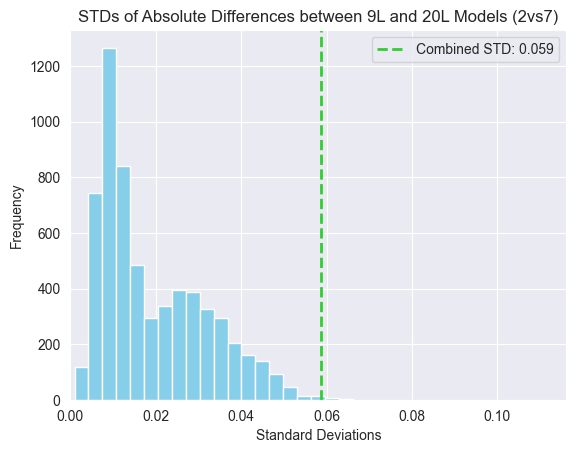

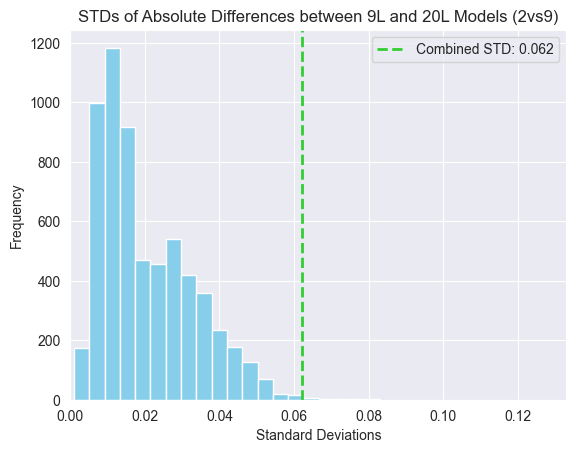

In [11]:
for comparison in ['2vs7', '2vs9']:
    plot_std_histogram(
        std_results['LP'][comparison],  
        std_all_results['LP'][comparison],  
        f'STDs of Absolute Differences between 9L and 20L Models ({comparison})'
    )

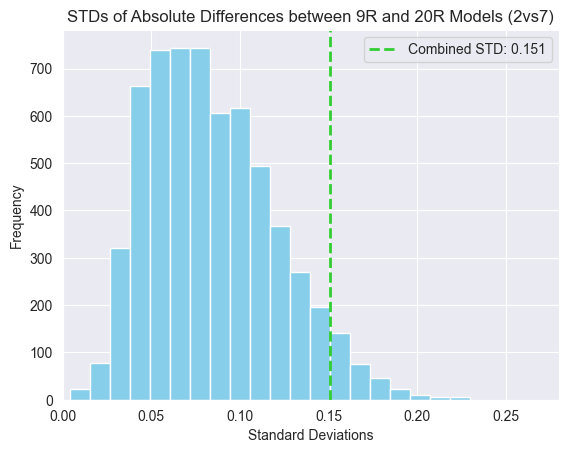

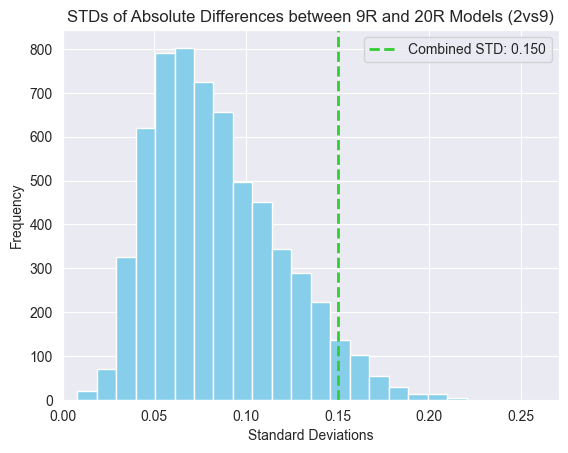

In [12]:
for comparison in ['2vs7', '2vs9']:
    plot_std_histogram(
        std_results['RP'][comparison],  
        std_all_results['RP'][comparison],  
        f'STDs of Absolute Differences between 9R and 20R Models ({comparison})'
    )